In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

In [3]:
energy_0 = pd.read_csv('http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz')
print(energy_0.head())

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


In [8]:
energy_0['timestamp'] = pd.to_datetime(energy_0['timestamp'])
energy_0['hour'] = energy_0['timestamp'].dt.hour
print(energy_0)

      building_id  meter           timestamp  meter_reading  hour
0               0      0 2016-01-01 00:00:00          0.000     0
1               0      0 2016-01-01 01:00:00          0.000     1
2               0      0 2016-01-01 02:00:00          0.000     2
3               0      0 2016-01-01 03:00:00          0.000     3
4               0      0 2016-01-01 04:00:00          0.000     4
...           ...    ...                 ...            ...   ...
8779            0      0 2016-12-31 19:00:00        232.071    19
8780            0      0 2016-12-31 20:00:00        189.069    20
8781            0      0 2016-12-31 21:00:00        169.958    21
8782            0      0 2016-12-31 22:00:00        169.958    22
8783            0      0 2016-12-31 23:00:00        175.418    23

[8784 rows x 5 columns]


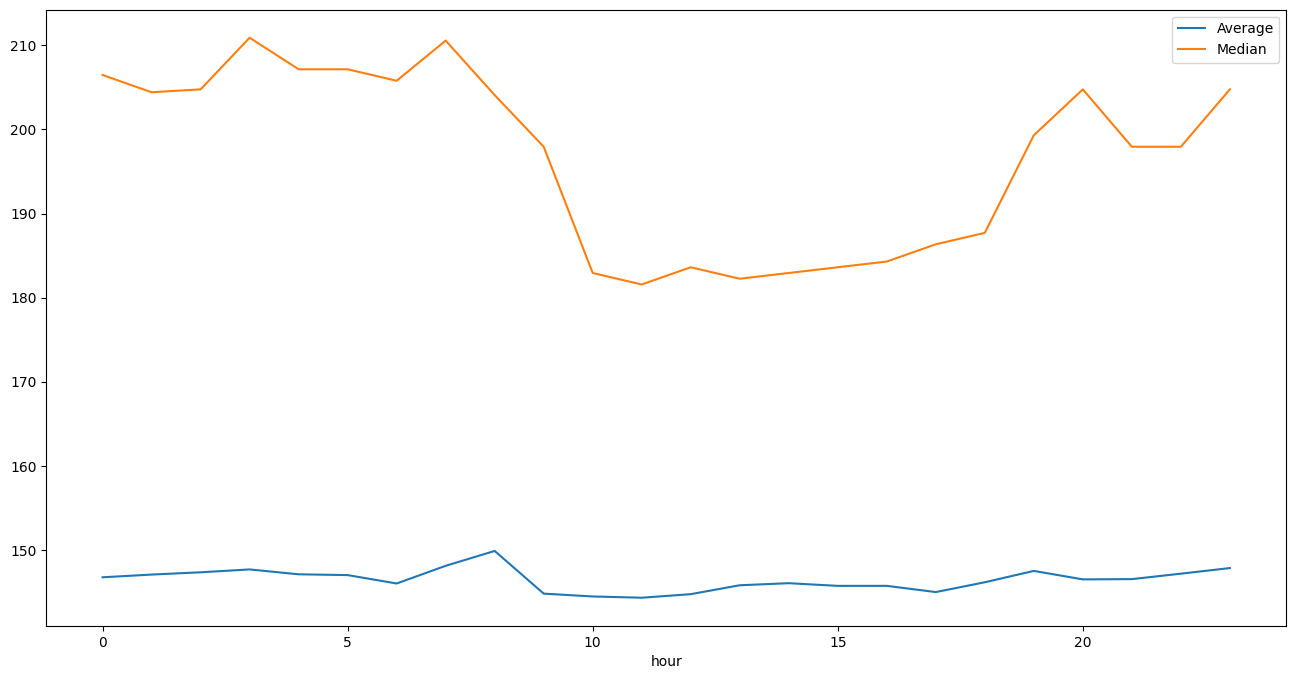

In [10]:
energy_0_hours = energy_0.groupby('hour')
energy_0_average = pd.DataFrame(
    {'Average': energy_0_hours.mean()['meter_reading'],
    'Median': energy_0_hours.median()['meter_reading']})
energy_0_average.plot()
plt.show()

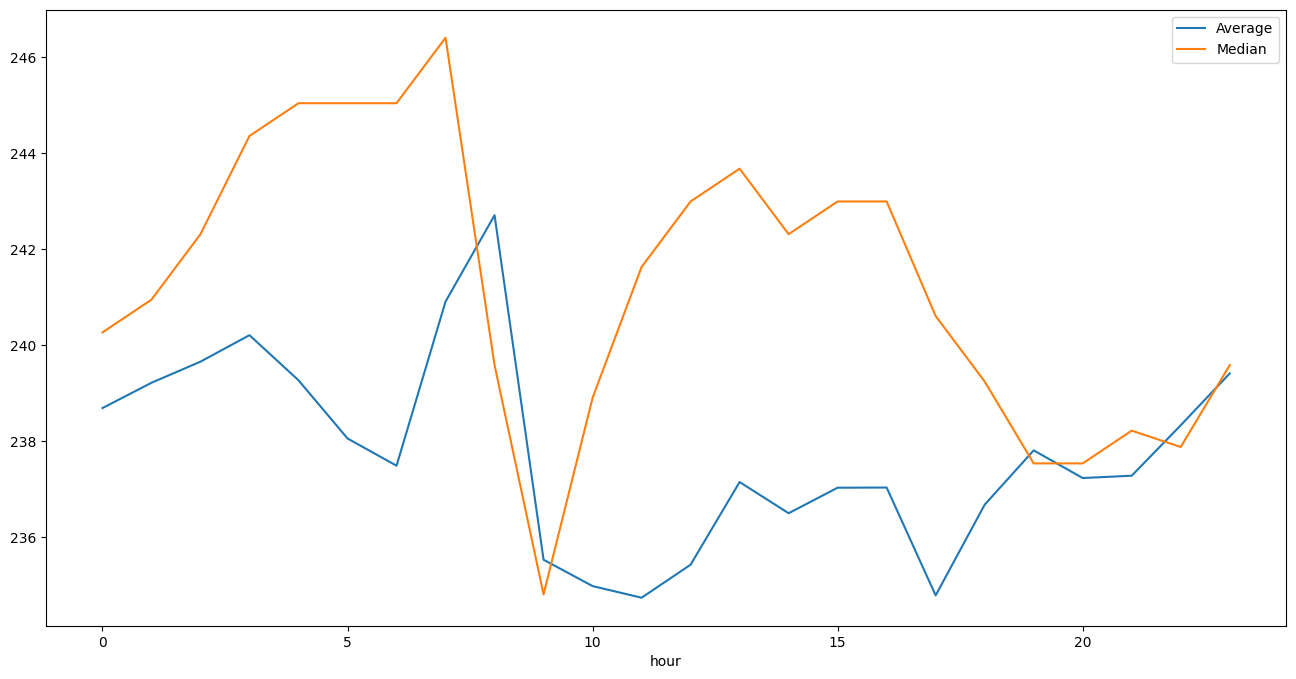

In [12]:
energy_0_hours_filtered = energy_0[energy_0['meter_reading']>0].groupby('hour')
energy_0_averages_filtered = pd.DataFrame(
    {'Average': energy_0_hours_filtered.mean()['meter_reading'],
    'Median': energy_0_hours_filtered.median()['meter_reading']})
energy_0_averages_filtered.plot()
plt.show()

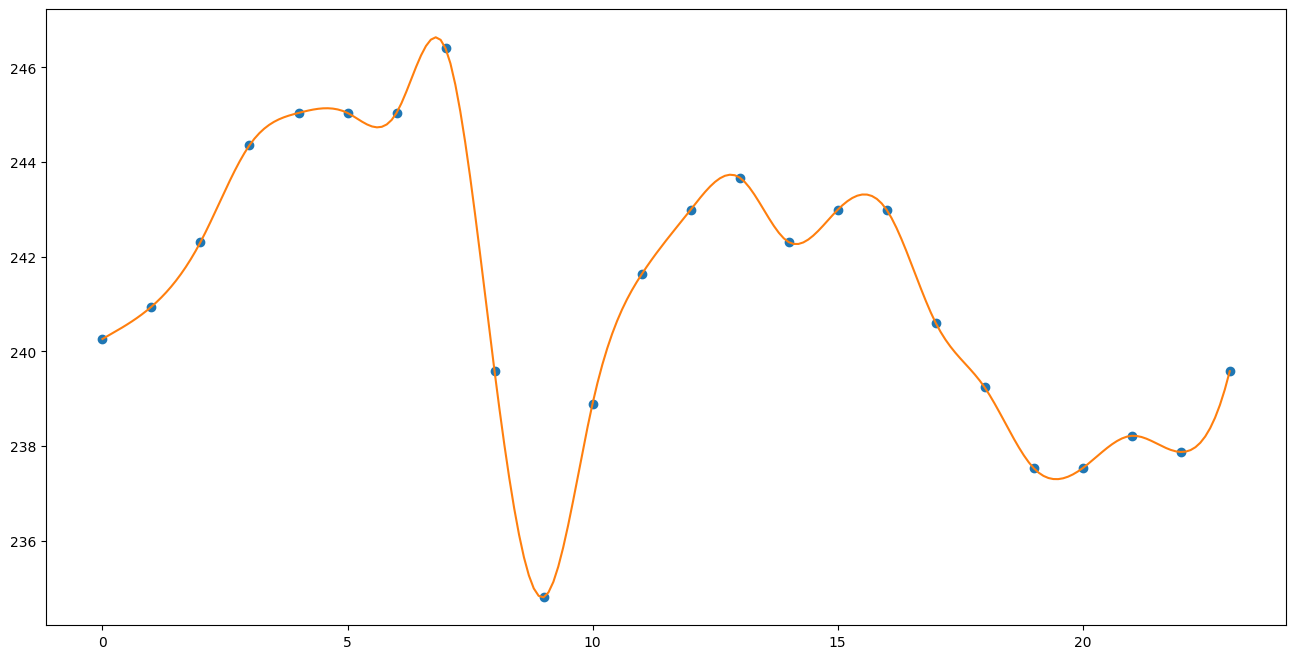

In [13]:
x = np.arange(0, 24)
y = interp1d(x, energy_0_hours_filtered.median()['meter_reading'], kind='cubic')
xn = np.arange(0, 23.1, 0.1)
yn = y(xn)
plt.plot(x, energy_0_hours_filtered.median()['meter_reading'],
        'o', xn, yn, '-')